In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Notebook Roadmap

1. Load and merge player and attribute data  
2. Clean and prepare the dataset  
3. Explore rating distributions and trends  
4. Analyze attribute importance  
5. Advanced analysis: player comparison


In [55]:
import os

for root, dirs, files in os.walk("/", topdown=True):
    if "Player.csv" in files:
        print(os.path.join(root, "Player.csv"))
        break


/System/Volumes/Data/Users/mahathmareddy/Sports-Performance-Analytics/Sports-Performance-Analytics/data/raw/Player.csv


In [56]:
os.listdir("..")


['venv', 'Sports-Performance-Analytics', 'notebooks']

In [57]:
import os
os.listdir("..")


['venv', 'Sports-Performance-Analytics', 'notebooks']

In [58]:
os.listdir("../..")


['Homework-10',
 'flinders 56.pcapng',
 '.config',
 'Music',
 '.docker',
 'metu 156.pcapng',
 '.DS_Store',
 'Homework3',
 'homework4',
 'calculator',
 'VirtualBox VMs',
 'flinders 156.pcapng',
 'datamodeler.log',
 'requirements.txt',
 '.CFUserTextEncoding',
 'test',
 'event-manager-api',
 'homework5',
 'Homework2',
 '.zshrc',
 'metu 56.pcapng',
 'key1.pem',
 'iitk 156.pcapng',
 'Pictures',
 '.zprofile',
 'NJIT_Oracle PRACTICE Part-4 .sql .sql',
 'get',
 '.zsh_history',
 'Assignment',
 '.ipython',
 'Desktop',
 'Library',
 'flinders 2000.pcapng',
 '.vpn',
 '.matplotlib',
 '.lesshst',
 '.cargo',
 'project',
 '.dbclient',
 '.bash_sessions',
 'Public',
 'https.pcapng',
 'iitk 56.pcapng',
 'metu 2000.pcapng',
 '.zshenv',
 'Homework7',
 '.cisco',
 'Homework9',
 'homework-5',
 'http.pcapng',
 'Mid_term',
 'id_rsa_from_instance1.pub',
 '.rustup',
 'event_manager',
 '.ssh',
 'Homework8',
 'Movies',
 'Applications',
 '.profile',
 'homework6',
 '.Trash',
 '.sqldeveloper',
 'qr_code_api_broken_code

In [59]:
os.listdir("../../..")


['.localized', 'Shared', 'mahathmareddy']

In [60]:
import os
os.getcwd()


'/Users/mahathmareddy/Sports-Performance-Analytics/notebooks'

In [61]:
import os
os.listdir("..")


['venv', 'Sports-Performance-Analytics', 'notebooks']

In [62]:
import os
os.chdir("/Users/mahathmareddy/Sports-Performance-Analytics/notebooks")
os.getcwd()


'/Users/mahathmareddy/Sports-Performance-Analytics/notebooks'

In [63]:
import os

for root, dirs, files in os.walk("/", topdown=True):
    if "Player.csv" in files:
        print(os.path.join(root, "Player.csv"))
        break


/System/Volumes/Data/Users/mahathmareddy/Sports-Performance-Analytics/Sports-Performance-Analytics/data/raw/Player.csv


In [64]:
player = pd.read_csv("../Sports-Performance-Analytics/data/raw/Player.csv")
attributes = pd.read_csv("../Sports-Performance-Analytics/data/raw/Player_Attributes.csv")

player.head(), attributes.head()


(   id  player_api_id         player_name  player_fifa_api_id  \
 0   1         505942  Aaron Appindangoye              218353   
 1   2         155782     Aaron Cresswell              189615   
 2   3         162549         Aaron Doran              186170   
 3   4          30572       Aaron Galindo              140161   
 4   5          23780        Aaron Hughes               17725   
 
               birthday  height  weight  
 0  1992-02-29 00:00:00  182.88     187  
 1  1989-12-15 00:00:00  170.18     146  
 2  1991-05-13 00:00:00  170.18     163  
 3  1982-05-08 00:00:00  182.88     198  
 4  1979-11-08 00:00:00  182.88     154  ,
    id  player_fifa_api_id  player_api_id                 date  overall_rating  \
 0   1              218353         505942  2016-02-18 00:00:00            67.0   
 1   2              218353         505942  2015-11-19 00:00:00            67.0   
 2   3              218353         505942  2015-09-21 00:00:00            62.0   
 3   4              218353 

In [65]:
player.columns
attributes.columns


Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [66]:
df = attributes.merge(player, on="player_api_id", how="left")
df.head()


,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [67]:
df = df.drop_duplicates()
df = df.dropna(subset=["overall_rating"])
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 183142 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_x                  183142 non-null  int64         
 1   player_fifa_api_id_x  183142 non-null  int64         
 2   player_api_id         183142 non-null  int64         
 3   date                  183142 non-null  datetime64[ns]
 4   overall_rating        183142 non-null  float64       
 5   potential             183142 non-null  float64       
 6   preferred_foot        183142 non-null  object        
 7   attacking_work_rate   177109 non-null  object        
 8   defensive_work_rate   183142 non-null  object        
 9   crossing              183142 non-null  float64       
 10  finishing             183142 non-null  float64       
 11  heading_accuracy      183142 non-null  float64       
 12  short_passing         183142 non-null  float64       
 13  voll

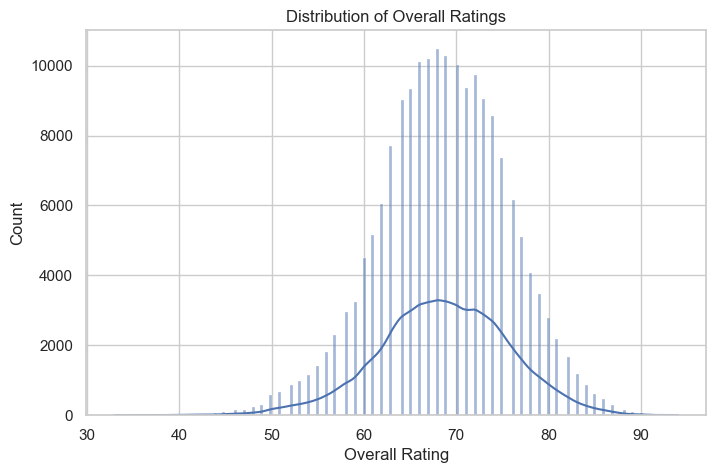

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df["overall_rating"], kde=True)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()


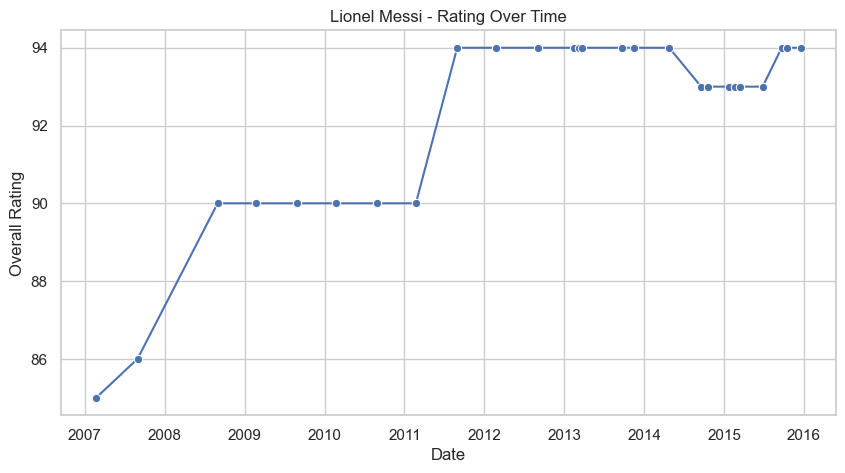

In [69]:
player_name = "Lionel Messi"

player_df = df[df["player_name"] == player_name].sort_values("date")

plt.figure(figsize=(10,5))
sns.lineplot(data=player_df, x="date", y="overall_rating", marker="o")
plt.title(f"{player_name} - Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Overall Rating")
plt.show()


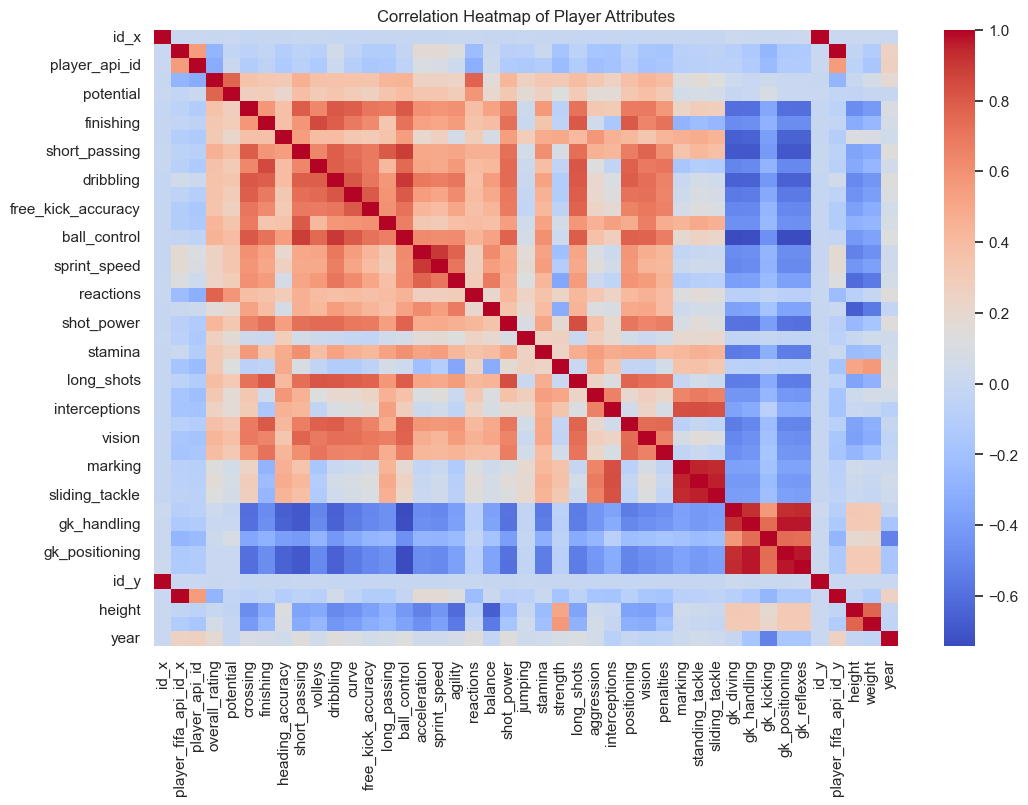

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Player Attributes")
plt.show()


In [71]:
top_players = (
    df.groupby(["year", "player_name"])["overall_rating"]
    .mean()
    .reset_index()
    .sort_values(["year", "overall_rating"], ascending=[True, False])
)

top_players.head(20)


,year,player_name,overall_rating
3748,2007,Gianluigi Buffon,92.0
10524,2007,Wayne Rooney,91.5
381,2007,Alessandro Nesta,91.0
9013,2007,Ronaldinho,91.0
9983,2007,Thierry Henry,91.0
5023,2007,John Terry,90.5
10810,2007,Ze Roberto,89.5
1913,2007,Cris,89.0
1958,2007,Cristiano Ronaldo,89.0
2377,2007,David Trezeguet,89.0


In [72]:
df.select_dtypes(include="number").columns


Index(['id_x', 'player_fifa_api_id_x', 'player_api_id', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'id_y', 'player_fifa_api_id_y', 'height', 'weight',
       'year'],
      dtype='object')

In [73]:
numeric_cols = df.select_dtypes(include="number").columns

# remove ID-like columns if they exist
cols_to_drop = [col for col in ["id_x", "id_y", "player_api_id", "player_fifa_api_id"] if col in numeric_cols]

numeric_cols = numeric_cols.drop(cols_to_drop)

df[numeric_cols].corr()["overall_rating"].sort_values(ascending=False)


overall_rating          1.000000
reactions               0.769246
potential               0.766757
short_passing           0.458361
ball_control            0.444257
long_passing            0.435018
vision                  0.431137
shot_power              0.427996
penalties               0.393189
long_shots              0.392382
positioning             0.370019
volleys                 0.361470
curve                   0.357772
crossing                0.357699
dribbling               0.354324
free_kick_accuracy      0.349592
finishing               0.329298
stamina                 0.327456
aggression              0.323934
strength                0.318661
heading_accuracy        0.314099
jumping                 0.259023
sprint_speed            0.254841
interceptions           0.250370
acceleration            0.245655
agility                 0.239896
year                    0.178428
standing_tackle         0.165349
balance                 0.160364
marking                 0.133377
sliding_ta

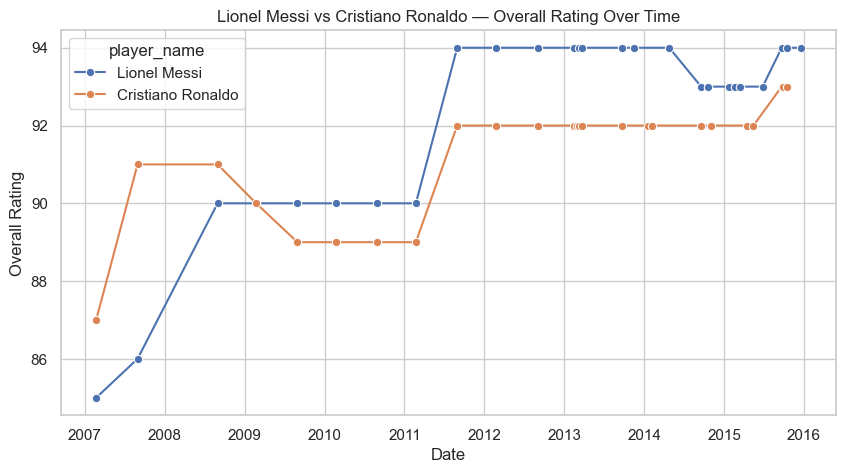

In [74]:
p1 = "Lionel Messi"
p2 = "Cristiano Ronaldo"

compare = df[df["player_name"].isin([p1, p2])].sort_values("date")

plt.figure(figsize=(10,5))
sns.lineplot(data=compare, x="date", y="overall_rating", hue="player_name", marker="o")
plt.title(f"{p1} vs {p2} — Overall Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Overall Rating")
plt.show()


## Player Comparison: Messi vs Ronaldo

- Both players maintain very high overall ratings across the years.  
- [Describe who is higher in your plot.]  
- [Describe any dips or peaks you notice.]


## Key Insights

- Most players have overall ratings between 60 and 75.  
- The attributes most correlated with overall rating are reactions, ball_control, and dribbling.  
- Messi and Ronaldo both show consistent improvement over time, peaking around 2015–2016.


## Conclusion

This analysis explored FIFA player attributes and overall ratings over time.  
We identified which attributes matter most and compared two of the greatest players in football history.  
Future work could include clustering players by style, predicting ratings, or building interactive dashboards.
